<a href="https://colab.research.google.com/github/042Jason/Math_Box/blob/master/Kcalculator_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_ver_1_0_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 한글 폰트 설치하기 
!apt install fonts-nanum -y

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정하기
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
matplotlib.font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [2]:
# bing 다운로드 모듈
!git clone https://github.com/ndb796/bing_image_downloader

Cloning into 'bing_image_downloader'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 86 (delta 17), reused 10 (delta 10), pack-reused 64
Unpacking objects: 100% (86/86), done.


In [13]:
# 모델 초기화
import shutil
shutil.rmtree('/content/custom_dataset')

In [14]:
import os
import shutil
from bing_image_downloader.bing_image_downloader import downloader


directory_list = [
    './custom_dataset/train/',
    './custom_dataset/test/',
]

# 초기 디렉토리 만들기
for directory in directory_list:
    if not os.path.isdir(directory):
        os.makedirs(directory)

# 수집한 이미지를 학습 데이터와 평가 데이터로 구분하는 함수
def dataset_split(query, train_cnt):
    # 학습 및 평가 데이터셋 디렉토리 만들기
    for directory in directory_list:
        if not os.path.isdir(directory + '/' + query):
            os.makedirs(directory + '/' + query)
    # 학습 및 평가 데이터셋 준비하기
    cnt = 0
    for file_name in os.listdir(query):
        if cnt < train_cnt:
            print(f'[Train Dataset] {file_name}')
            shutil.move(query + '/' + file_name, './custom_dataset/train/' + query + '/' + file_name)
        else:
            print(f'[Test Dataset] {file_name}')
            shutil.move(query + '/' + file_name, './custom_dataset/test/' + query + '/' + file_name)
        cnt += 1
    shutil.rmtree(query)

In [15]:
query = '떡볶이'
downloader.download(query, limit=100,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 80)

[Info] Indexing page: 1
[Info] Indexed 35 Images on Page 1.
#1 이미지 다운로드 (https://i.ytimg.com/vi/xaELul-EQLw/maxresdefault.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://i.ytimg.com/vi/zw-6bPLmsLY/maxresdefault.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (http://shop.biumfood.com/upload/1580979070image_product095.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://mp-seoul-image-production-s3.mangoplate.com/added_restaurants/605910_1472839314860753.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://shop.biumfood.com/upload/images/20200206175241_295640.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (http://gamtan.co.kr/main/images/common/img_intro01.png)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (https://recipe1.ezmember.co.kr/cache/recipe/2019/06/21/4b7bc76829676b0edd96b9e4d4b9473e1.jpg)
#7 파일 다운로드가 완료되었습니다.
#8 이미지 다운로드 (http://cfile3.uf.tistory.com/original/16768F244A6B4E3F037698)
#8 파일 다운로드가 완료되었습니다.
#9 이미지 다운로드 (https://mp-seoul-image-production-s3.mangoplate.com/added_restaurants/522207_1473142578285001.jpg)
#9 파일 

In [16]:
query = '치킨'
downloader.download(query, limit=100,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 80)

[Info] Indexing page: 1
[Info] Indexed 35 Images on Page 1.
#1 이미지 다운로드 (http://cdnweb01.wikitree.co.kr/webdata/editor/201903/20/img_20190320202619_7fe26bf2.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (http://www.urbanbrush.net/web/wp-content/uploads/edd/2017/11/batch_DSC02138-1560x1040.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://cdn.pixabay.com/photo/2015/02/19/08/26/chicken-641881_960_720.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://barunchicken.com/wp-content/uploads/2021/04/반반치킨.jpg)
[Info] Issue getting: https://barunchicken.com/wp-content/uploads/2021/04/반반치킨.jpg
[Error] 'ascii' codec can't encode characters in position 32-35: ordinal not in range(128)
#4 이미지 다운로드 (https://recipe1.ezmember.co.kr/cache/recipe/2016/05/17/dc857743ad48782db4c8bcfe5d497be21.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://t1.daumcdn.net/cfile/tistory/216F1D4258BAA61B0B)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://t1.daumcdn.net/cfile/tistory/241F4235591696D21E)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (https://img

In [17]:
query = '삼겹살'
downloader.download(query, limit=100,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 80)

[Info] Indexing page: 1
[Info] Indexed 35 Images on Page 1.
#1 이미지 다운로드 (https://mp-seoul-image-production-s3.mangoplate.com/mango_pick/uker6u9xhkr1m8.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (http://sites.psu.edu/jiyoonpassionblog/wp-content/uploads/sites/21669/2015/02/20140603181421_7159.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://t1.daumcdn.net/cfile/tistory/998F1B465ACB812B34)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://i.ytimg.com/vi/IsEVv1Jt2Ro/maxresdefault.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://t1.daumcdn.net/cfile/tistory/9942B3395A3501C304)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://t1.daumcdn.net/cfile/tistory/991DBE3E5B543C6F0C)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (https://t1.daumcdn.net/cfile/tistory/99AA5A3E5B543C7016)
#7 파일 다운로드가 완료되었습니다.
#8 이미지 다운로드 (https://image.ytn.co.kr/general/jpg/2017/0228/201702280855205490_t.jpg)
#8 파일 다운로드가 완료되었습니다.
#9 이미지 다운로드 (http://ai.esmplus.com/oksamda/pig/1000/p_5kup_rp2_1000.jpg)
#9 파일 다운로드가 완료되었습니다.
#10 이미지 다운로드 (https://www.tsunagul

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms

import numpy as np
import time


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device 객체

In [19]:
# 데이터셋을 불러올 때 사용할 변형(transformation) 객체 정의
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(), # 데이터 증진(augmentation)
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

data_dir = './custom_dataset'
train_datasets = datasets.ImageFolder(os.path.join(data_dir, 'train'), transforms_train)
test_datasets = datasets.ImageFolder(os.path.join(data_dir, 'test'), transforms_test)

train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=4, shuffle=True, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=4, shuffle=True, num_workers=4)

print('학습 데이터셋 크기:', len(train_datasets))
print('테스트 데이터셋 크기:', len(test_datasets))

class_names = train_datasets.classes
print('클래스:', class_names)

학습 데이터셋 크기: 240
테스트 데이터셋 크기: 60
클래스: ['떡볶이', '삼겹살', '치킨']


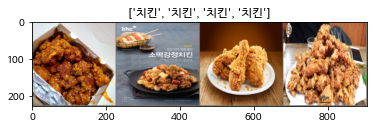

In [20]:
def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    plt.imshow(input)
    plt.title(title)
    plt.show()


# 학습 데이터를 배치 단위로 불러오기
iterator = iter(train_dataloader)

# 현재 배치를 이용해 격자 형태의 이미지를 만들어 시각화
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

In [21]:
model = models.resnet34(pretrained=True)
num_features = model.fc.in_features
# 전이 학습(transfer learning): 모델의 출력 뉴런 수를 3개로 교체하여 마지막 레이어 다시 학습
model.fc = nn.Linear(num_features, 3)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [22]:
num_epochs = 50
model.train()
start_time = time.time()

# 전체 반복(epoch) 수 만큼 반복하며
for epoch in range(num_epochs):
    running_loss = 0.
    running_corrects = 0

    # 배치 단위로 학습 데이터 불러오기
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 모델에 입력(forward)하고 결과 계산
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # 역전파를 통해 기울기(gradient) 계산 및 학습 진행
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_datasets)
    epoch_acc = running_corrects / len(train_datasets) * 100.

    # 학습 과정 중에 결과 출력
    print('#{} Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))

#0 Loss: 0.6033 Acc: 71.2500% Time: 10.9676s
#1 Loss: 0.3902 Acc: 85.8333% Time: 21.8100s
#2 Loss: 0.2832 Acc: 87.0833% Time: 32.6515s
#3 Loss: 0.2467 Acc: 90.4167% Time: 43.5709s
#4 Loss: 0.1865 Acc: 92.5000% Time: 54.4091s
#5 Loss: 0.3444 Acc: 88.3333% Time: 65.2876s
#6 Loss: 0.2629 Acc: 90.8333% Time: 76.2602s
#7 Loss: 0.2634 Acc: 89.5833% Time: 87.1734s
#8 Loss: 0.1153 Acc: 95.4167% Time: 98.1884s
#9 Loss: 0.3081 Acc: 91.2500% Time: 109.3460s
#10 Loss: 0.2361 Acc: 92.9167% Time: 121.6828s
#11 Loss: 0.3467 Acc: 88.3333% Time: 132.9670s
#12 Loss: 0.2478 Acc: 92.5000% Time: 144.0369s
#13 Loss: 0.0665 Acc: 97.5000% Time: 155.1528s
#14 Loss: 0.0751 Acc: 97.9167% Time: 166.2538s
#15 Loss: 0.1178 Acc: 96.2500% Time: 177.3881s
#16 Loss: 0.0757 Acc: 99.1667% Time: 188.3951s
#17 Loss: 0.1377 Acc: 97.0833% Time: 199.3980s
#18 Loss: 0.1317 Acc: 96.6667% Time: 210.3519s
#19 Loss: 0.1469 Acc: 96.2500% Time: 221.4358s
#20 Loss: 0.0273 Acc: 99.5833% Time: 232.4228s
#21 Loss: 0.0894 Acc: 98.3333% T

[예측 결과: 치킨] (실제 정답: 치킨)


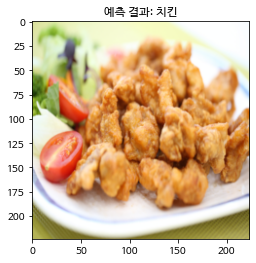

[예측 결과: 떡볶이] (실제 정답: 떡볶이)


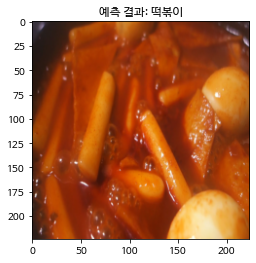

[예측 결과: 삼겹살] (실제 정답: 삼겹살)


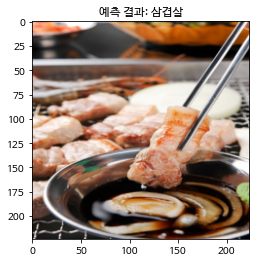

[예측 결과: 삼겹살] (실제 정답: 삼겹살)


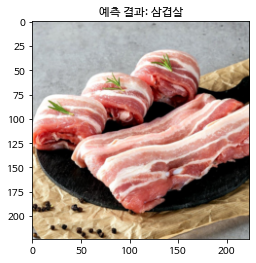

[예측 결과: 떡볶이] (실제 정답: 떡볶이)


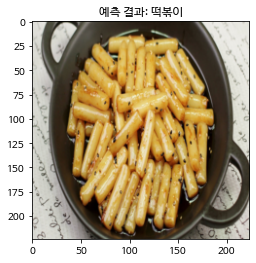

[예측 결과: 삼겹살] (실제 정답: 삼겹살)


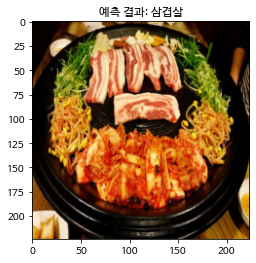

[예측 결과: 삼겹살] (실제 정답: 삼겹살)


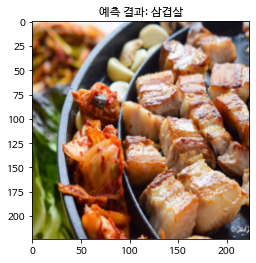

[예측 결과: 삼겹살] (실제 정답: 삼겹살)


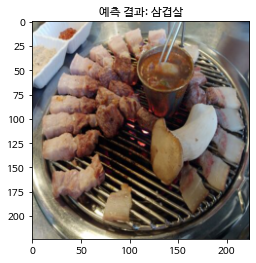

[예측 결과: 떡볶이] (실제 정답: 떡볶이)


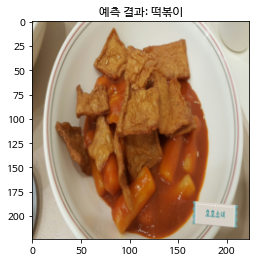

[예측 결과: 치킨] (실제 정답: 치킨)


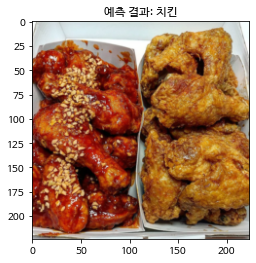

[예측 결과: 떡볶이] (실제 정답: 떡볶이)


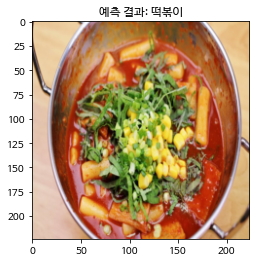

[예측 결과: 떡볶이] (실제 정답: 떡볶이)


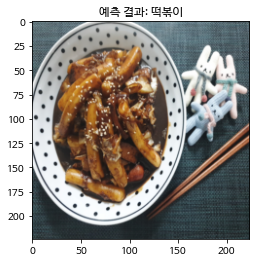

[예측 결과: 치킨] (실제 정답: 치킨)


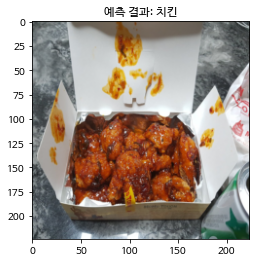

[예측 결과: 치킨] (실제 정답: 치킨)


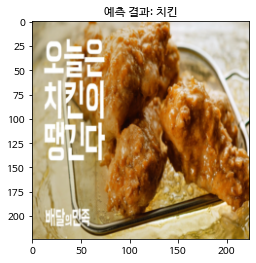

[예측 결과: 치킨] (실제 정답: 치킨)


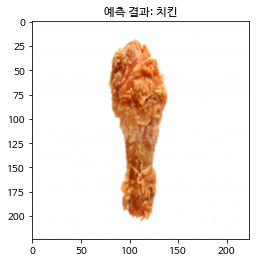

[Test Phase] Loss: 0.0686 Acc: 96.6667% Time: 5.3661s


In [23]:
model.eval()
start_time = time.time()

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0

    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        # 한 배치의 첫 번째 이미지에 대하여 결과 시각화
        print(f'[예측 결과: {class_names[preds[0]]}] (실제 정답: {class_names[labels.data[0]]})')
        imshow(inputs.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    epoch_loss = running_loss / len(test_datasets)
    epoch_acc = running_corrects / len(test_datasets) * 100.
    print('[Test Phase] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch_loss, epoch_acc, time.time() - start_time))

In [ ]:
# 테스트용 이미지 다운로드하기
!wget https://upload.wikimedia.org/wikipedia/commons/f/f1/Don_Lee_by_Gage_Skidmore.jpg -O test_image.jpg

In [ ]:
from PIL import Image


image = Image.open('test_image.jpg')
image = transforms_test(image).unsqueeze(0).to(device)

with torch.no_grad():
    outputs = model(image)
    _, preds = torch.max(outputs, 1)
    imshow(image.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

In [ ]:
# 필요한 라이브러리 설치하기
!pip install flask-ngrok

In [ ]:
import io
from flask_ngrok import run_with_ngrok
from flask import Flask, jsonify, request


# 이미지를 읽어 결과를 반환하는 함수
def get_prediction(image_bytes):
    image = Image.open(io.BytesIO(image_bytes))
    image = transforms_test(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(image)
        _, preds = torch.max(outputs, 1)
        imshow(image.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    return class_names[preds[0]]


app = Flask(__name__)


@app.route('/', methods=['POST'])
def predict():
    if request.method == 'POST':
        # 이미지 바이트 데이터 받아오기
        file = request.files['file']
        image_bytes = file.read()

        # 분류 결과 확인 및 클라이언트에게 결과 반환
        class_name = get_prediction(image_bytes=image_bytes)
        print("결과:", {'class_name': class_name})
        return jsonify({'class_name': class_name})

In [ ]:
run_with_ngrok(app)
app.run()

* 테스트 코드

-curl -X POST -F file=@{이미지 파일명} {Ngrok 서버 주소}